In [1]:
from ActivePyTools.grab_data import eval_object_columns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import chardet

from model_utils import *

crop_path = '../docs/crop_pics/google/'
project_root = '../'

def get_picture_path(relative_path):
    return project_root + relative_path

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def grab_df_data(df_path):
    with open(df_path, 'rb') as file:
        encoding = chardet.detect(file.read())['encoding']

    temp_df = pd.read_csv(df_path, encoding=encoding)
    df = eval_object_columns(temp_df)
    return df

# Use Location Data

## Load Data

In [3]:
loc_df = grab_df_data('../data/digit_data/loc_df.csv')
loc_df['label'] = loc_df['label'].astype(int)
loc_df['idx'] = loc_df['idx'].astype(int)

## Prepare Data

In [4]:
X_loc_train = loc_df[loc_df['type']=='train'].drop(columns=['label', 'idx', 'type'])
y_loc_train = loc_df[loc_df['type']=='train']['label']
X_loc_valid = loc_df[loc_df['type']=='valid'].drop(columns=['label', 'idx', 'type'])
y_loc_valid = loc_df[loc_df['type']=='valid']['label']
X_loc_test = loc_df[loc_df['type']=='test'].drop(columns=['label', 'idx', 'type'])
y_loc_test = loc_df[loc_df['type']=='test']['label']

## Train

In [37]:
model_loc = LogisticRegression(max_iter=10000)  # max_iter may be set higher if convergence issues occur

model_loc.fit(X_loc_train, y_loc_train);

## Tune Hyperparameter

D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


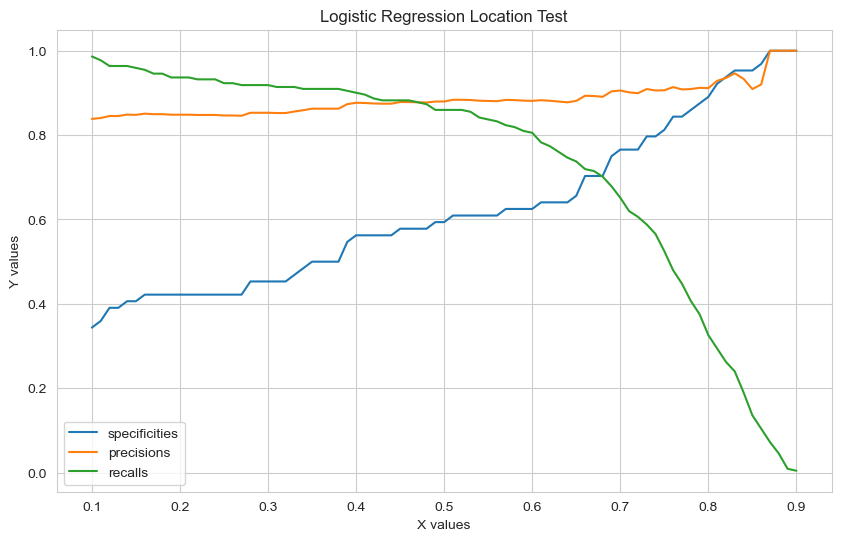

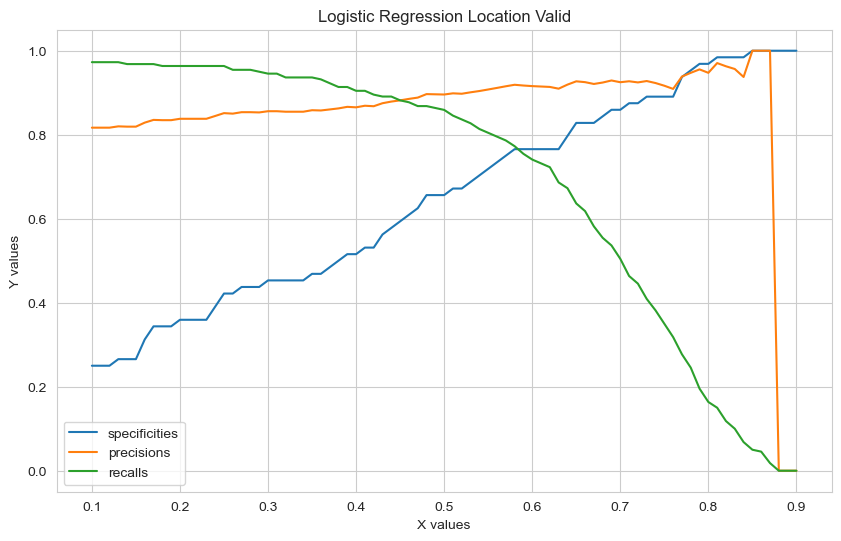

In [49]:
precisions_1, recalls_1, specificities_1 = [], [], []
precisions_2, recalls_2, specificities_2 = [], [], []
rang = np.arange(0.1, 0.91, 0.01)

for th in rang:
    test_probs = model_loc.predict_proba(X_loc_test)[:, 1]
    test_pred = (test_probs >= th).astype(int)
    prec1, recal1, spec1, _ = apply_metric(y_loc_test, test_pred, False)
    valid_probs = model_loc.predict_proba(X_loc_valid)[:, 1]
    valid_pred = (valid_probs >= th).astype(int)
    prec2, recal2, spec2, _ = apply_metric(y_loc_valid, valid_pred, False)
    precisions_1.append(prec1)
    recalls_1.append(recal1)
    specificities_1.append(spec1)
    precisions_2.append(prec2)
    recalls_2.append(recal2)
    specificities_2.append(spec2)

plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_1, label='specificities')
plt.plot(rang, precisions_1, label='precisions')
plt.plot(rang, recalls_1, label='recalls')

plt.title('Logistic Regression Location Test')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_2, label='specificities')
plt.plot(rang, precisions_2, label='precisions')
plt.plot(rang, recalls_2, label='recalls')

plt.title('Logistic Regression Location Valid')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()

In [50]:
threshold = 0.8

highest_value = 0
highest_idx = 0

for idx, (val1, val2, val3) in enumerate(zip(precisions_1, recalls_1, specificities_1)):
    if val1 >= threshold and val2 >= threshold:
        if val3 > highest_value:
            highest_value = val3
            highest_idx = idx

print("TEST DATASET")
print(f"id = {highest_idx}")
print(f'Precision: {precisions_1[highest_idx]:.2f}')
print(f'Recall: {recalls_1[highest_idx]:.2f}')
print(f'Specificity: {specificities_1[highest_idx]:.2f}')

highest_value = 0
highest_idx = 0

for idx, (val1, val2, val3) in enumerate(zip(precisions_2, recalls_2, specificities_2)):
    if val1 >= threshold and val2 >= threshold:
        if val3 > highest_value:
            highest_value = val3
            highest_idx = idx

print("\nVALID DATASET")
print(f"id = {highest_idx}")
print(f'Precision: {precisions_2[highest_idx]:.2f}')
print(f'Recall: {recalls_2[highest_idx]:.2f}')
print(f'Specificity: {specificities_2[highest_idx]:.2f}')

TEST DATASET
id = 47
Precision: 0.88
Recall: 0.82
Specificity: 0.62

VALID DATASET
id = 45
Precision: 0.91
Recall: 0.80
Specificity: 0.72


## Measure Performance

In [11]:
th = 0.44

print("Test Set\n")
test_probs = model_loc.predict_proba(X_loc_test)[:, 1]
test_pred = (test_probs >= th).astype(int)
prec1, recal1, spec1, _ = apply_metric(y_loc_test, test_pred)

print("\nValidation Set\n")
valid_probs = model_loc.predict_proba(X_loc_valid)[:, 1]
valid_pred = (valid_probs >= th).astype(int)
prec2, recal2, spec2, _ = apply_metric(y_loc_valid, valid_pred);

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm1, annot=True, fmt="d", cmap='Blues', square=True)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

Test Set

CM: 
[[ 36  28]
 [ 26 195]]
Precision: 0.87
Recall: 0.88
Specificity: 0.56
Accuracy: 0.81

Validation Set

CM: 
[[ 37  27]
 [ 24 196]]
Precision: 0.88
Recall: 0.89
Specificity: 0.58
Accuracy: 0.82


# Use Text Vector

## Load Data

In [12]:
vec_df = grab_df_data('../data/digit_data/vec_df.csv')
vec_df['label'] = vec_df['label'].astype(int)
vec_df['idx'] = vec_df['idx'].astype(int)

## Prepare Data

In [13]:
X_vec_train = vec_df[vec_df['type']=='train'].drop(columns=['label', 'idx', 'type'])
y_vec_train = vec_df[vec_df['type']=='train']['label']
X_vec_valid = vec_df[vec_df['type']=='valid'].drop(columns=['label', 'idx', 'type'])
y_vec_valid = vec_df[vec_df['type']=='valid']['label']
X_vec_test = vec_df[vec_df['type']=='test'].drop(columns=['label', 'idx', 'type'])
y_vec_test = vec_df[vec_df['type']=='test']['label']

## Train

In [40]:
model_vec = LogisticRegression(max_iter=10000)

model_vec.fit(X_vec_train, y_vec_train);

## Tune Hyperparameter

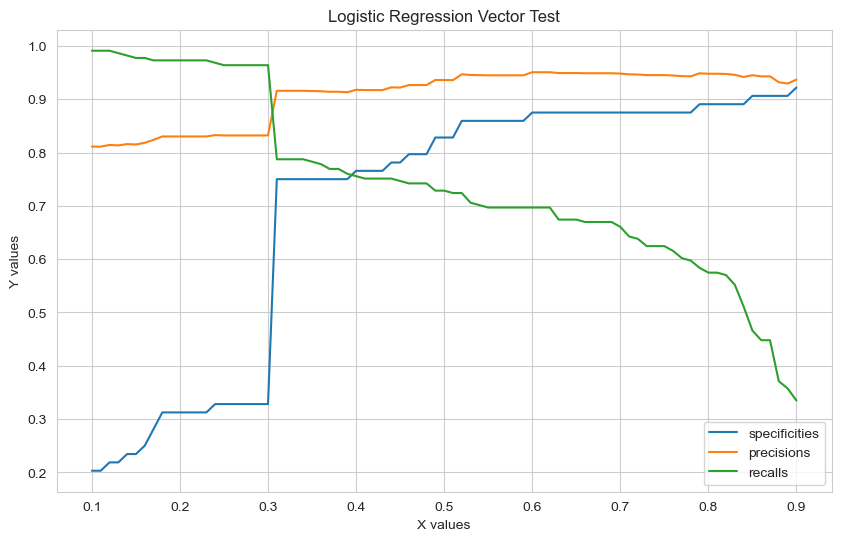

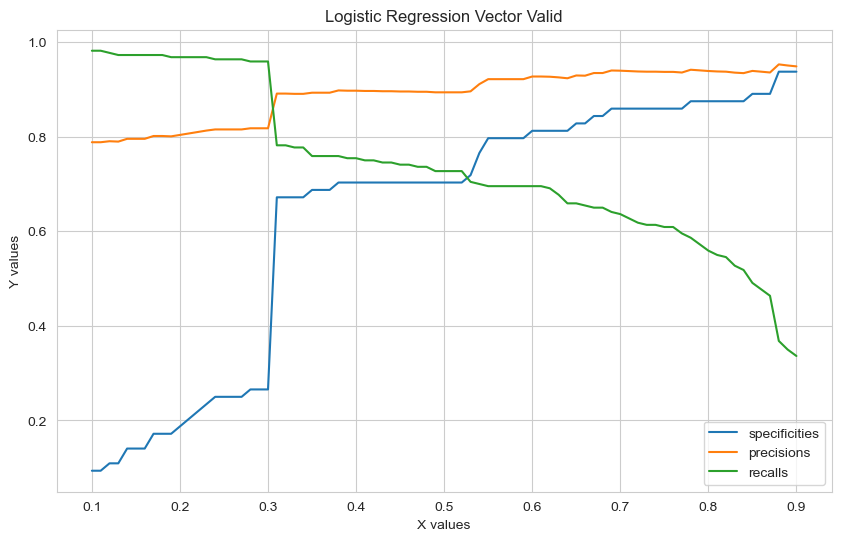

In [44]:
precisions_1, recalls_1, specificities_1 = [], [], []
precisions_2, recalls_2, specificities_2 = [], [], []
rang = np.arange(0.1, 0.91, 0.01)

for th in rang:
    test_probs = model_vec.predict_proba(X_vec_test)[:, 1]
    test_pred = (test_probs >= th).astype(int)
    prec1, recal1, spec1, _ = apply_metric(y_vec_test, test_pred, False)
    valid_probs = model_vec.predict_proba(X_vec_valid)[:, 1]
    valid_pred = (valid_probs >= th).astype(int)
    prec2, recal2, spec2, _ = apply_metric(y_vec_valid, valid_pred, False)
    precisions_1.append(prec1)
    recalls_1.append(recal1)
    specificities_1.append(spec1)
    precisions_2.append(prec2)
    recalls_2.append(recal2)
    specificities_2.append(spec2)

plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_1, label='specificities')
plt.plot(rang, precisions_1, label='precisions')
plt.plot(rang, recalls_1, label='recalls')

plt.title('Logistic Regression Vector Test')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_2, label='specificities')
plt.plot(rang, precisions_2, label='precisions')
plt.plot(rang, recalls_2, label='recalls')

plt.title('Logistic Regression Vector Valid')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()

In [48]:
threshold = 0.8

highest_value = 0 
highest_idx = 0

for idx, (val1, val2, val3) in enumerate(zip(precisions_1, recalls_1, specificities_1)):
    if val1 >= threshold and val2 >= threshold:
        if val3 > highest_value:
            highest_value = val3
            highest_idx = idx
            
print("TEST DATASET")
print(f"id = {highest_idx}")
print(f'Precision: {precisions_1[highest_idx]:.2f}')
print(f'Recall: {recalls_1[highest_idx]:.2f}')
print(f'Specificity: {specificities_1[highest_idx]:.2f}')

highest_value = 0
highest_idx = 0

for idx, (val1, val2, val3) in enumerate(zip(precisions_2, recalls_2, specificities_2)):
    if val1 >= threshold and val2 >= threshold:
        if val3 > highest_value:
            highest_value = val3
            highest_idx = idx

print("\nVALID DATASET")
print(f"id = {highest_idx}")
print(f'Precision: {precisions_2[highest_idx]:.2f}')
print(f'Recall: {recalls_2[highest_idx]:.2f}')
print(f'Specificity: {specificities_2[highest_idx]:.2f}')

TEST DATASET
id = 14
Precision: 0.83
Recall: 0.97
Specificity: 0.33

VALID DATASET
id = 18
Precision: 0.82
Recall: 0.96
Specificity: 0.27


## Measure Performance

In [20]:
print("Test Set\n")
test_probs = model_vec.predict_proba(X_vec_test)[:, 1]
test_pred = (test_probs >= th).astype(int)
apply_metric(y_vec_test, test_pred)
print("\nValidation Set\n")
valid_probs = model_vec.predict_proba(X_vec_valid)[:, 1]
valid_pred = (valid_probs >= th).astype(int)
apply_metric(y_vec_valid, valid_pred);

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm1, annot=True, fmt="d", cmap='Blues', square=True)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

Test Set

CM: 
[[ 56   8]
 [ 75 146]]
Precision: 0.95
Recall: 0.66
Specificity: 0.88
Accuracy: 0.71

Validation Set

CM: 
[[ 55   9]
 [ 80 140]]
Precision: 0.94
Recall: 0.64
Specificity: 0.86
Accuracy: 0.69


# Ensemble

In [21]:
val_preds1 = model_loc.predict_proba(X_loc_train)[:, 1]
val_preds2 = model_vec.predict_proba(X_vec_train)[:, 1]

stacked_features = np.column_stack((val_preds1, val_preds2))

In [22]:
from sklearn.linear_model import LogisticRegression

meta_model = LogisticRegression()
meta_model.fit(stacked_features, y_loc_train);

In [23]:
test_preds1 = model_loc.predict_proba(X_loc_test)[:, 1]
test_preds2 = model_vec.predict_proba(X_vec_test)[:, 1]
test_x  = np.column_stack((test_preds1, test_preds2))

test_pred = meta_model.predict(test_x)

apply_metric(y_loc_test, test_pred)

CM: 
[[ 46  18]
 [ 34 187]]
Precision: 0.91
Recall: 0.85
Specificity: 0.72
Accuracy: 0.82


(0.9121951219512195,
 0.8461538461538461,
 0.71875,
 array([[ 46,  18],
        [ 34, 187]], dtype=int64))

In [24]:
valid_preds1 = model_loc.predict_proba(X_loc_valid)[:, 1]
valid_preds2 = model_vec.predict_proba(X_vec_valid)[:, 1]
valid_x  = np.column_stack((valid_preds1, valid_preds2))

valid_pred = meta_model.predict(valid_x)

apply_metric(y_loc_valid, valid_pred)

CM: 
[[ 47  17]
 [ 45 175]]
Precision: 0.91
Recall: 0.80
Specificity: 0.73
Accuracy: 0.78


(0.9114583333333334,
 0.7954545454545454,
 0.734375,
 array([[ 47,  17],
        [ 45, 175]], dtype=int64))

# Store

In [25]:
from joblib import dump, load

dump(model_loc, 'location_logistic_regression.joblib')
dump(model_vec, 'vector_logistic_regression.joblib')
dump(meta_model, 'combined_logistic_regression.joblib')

['combined_logistic_regression.joblib']

# Example for using the Model

In [26]:
from LR_func import CustomLRModel
loc_df, X_loc_train, y_loc_train, X_loc_valid, y_loc_valid, X_loc_test, y_loc_test = load_loc_data('../')
vec_df, X_vec_train, y_vec_train, X_vec_valid, y_vec_valid, X_vec_test, y_vec_test = load_vec_data('../')

mod = CustomLRModel.load_model('./')

In [28]:
valid_pred = mod.predict(X_loc_valid, X_vec_valid)
apply_metric(y_loc_valid, valid_pred, True)

CM: 
[[ 47  17]
 [ 45 175]]
Precision: 0.91
Recall: 0.80
Specificity: 0.73
Accuracy: 0.78


(0.9114583333333334,
 0.7954545454545454,
 0.734375,
 array([[ 47,  17],
        [ 45, 175]], dtype=int64))

In [29]:
test_pred = mod.predict(X_loc_test, X_vec_test)
apply_metric(y_loc_test, test_pred, True)

CM: 
[[ 46  18]
 [ 34 187]]
Precision: 0.91
Recall: 0.85
Specificity: 0.72
Accuracy: 0.82


(0.9121951219512195,
 0.8461538461538461,
 0.71875,
 array([[ 46,  18],
        [ 34, 187]], dtype=int64))

# Try Cross Validation

In [33]:
from sklearn.linear_model import LogisticRegression

model_vec = LogisticRegression(max_iter=10000)
model_loc = LogisticRegression(max_iter=10000)
meta_model = LogisticRegression()

In [34]:
from model_utils import apply_metric

performance = []

for i in range(1, 6):
    folder = '../data/cross_valid/k' + str(i) + '/'
    loc_x_train = grab_df_data(folder + 'loc_x_train.csv')
    loc_x_valid = grab_df_data(folder + 'loc_x_valid.csv')
    vec_x_train = grab_df_data(folder + 'vec_x_train.csv')
    vec_x_valid = grab_df_data(folder + 'vec_x_valid.csv')
    y_train = grab_df_data(folder + 'y_train.csv').values.flatten()
    y_valid = grab_df_data(folder + 'y_valid.csv').values.flatten()
    
    model_loc.fit(loc_x_train, y_train)
    model_vec.fit(vec_x_train, y_train)

    loc_preds = model_loc.predict_proba(loc_x_train)[:, 1]
    vec_preds = model_vec.predict_proba(vec_x_train)[:, 1]
    
    combined_preds = np.column_stack((loc_preds, vec_preds))
    meta_model.fit(combined_preds, y_train)
    
    # validation
    valid_loc_preds = model_loc.predict_proba(loc_x_valid)[:, 1]
    valid_vec_preds = model_vec.predict_proba(vec_x_valid)[:, 1]
    valid_x  = np.column_stack((valid_loc_preds, valid_vec_preds))
    
    valid_pred = meta_model.predict(valid_x)

    performance.append(apply_metric(y_valid, valid_pred))

CM: 
[[139  37]
 [ 27 149]]
Precision: 0.80
Recall: 0.85
Specificity: 0.79
Accuracy: 0.82
CM: 
[[145  31]
 [ 15 161]]
Precision: 0.84
Recall: 0.91
Specificity: 0.82
Accuracy: 0.87
CM: 
[[158  18]
 [ 33 143]]
Precision: 0.89
Recall: 0.81
Specificity: 0.90
Accuracy: 0.86
CM: 
[[156  20]
 [ 29 147]]
Precision: 0.88
Recall: 0.84
Specificity: 0.89
Accuracy: 0.86
CM: 
[[153  23]
 [ 31 145]]
Precision: 0.86
Recall: 0.82
Specificity: 0.87
Accuracy: 0.85


In [35]:
loc_x_test = grab_df_data('../data/cross_valid/loc_x_test.csv')
vec_x_test = grab_df_data('../data/cross_valid/vec_x_test.csv')
y_test = grab_df_data('../data/cross_valid/y_test.csv').values.flatten()

test_loc_preds = model_loc.predict_proba(loc_x_test)[:, 1]
test_vec_preds = model_vec.predict_proba(vec_x_test)[:, 1]
test_x  = np.column_stack((test_loc_preds, test_vec_preds))

test_pred = meta_model.predict(test_x)

performance.append(apply_metric(y_test, test_pred, True))

CM: 
[[ 39  25]
 [ 39 182]]
Precision: 0.88
Recall: 0.82
Specificity: 0.61
Accuracy: 0.78
